In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
import pandas as pd

# Load and preprocess data
un_data = pd.read_excel("../data/raw/un_corruption.xlsx")
un_data.columns = un_data.iloc[1]
un_data = un_data[2:].reset_index(drop=True)

# Convert data types
un_data["year"] = pd.to_numeric(un_data["Year"])
un_data["VALUE"] = pd.to_numeric(un_data["VALUE"])

# Filter relevant data
un_data = un_data[(un_data['Indicator'] == 'Offences') &
                  (un_data['year'].between(2013, 2023)) &
                  (un_data['Unit of measurement'] == 'Rate per 100,000 population')]

# Drop unnecessary columns
un_data.drop(columns=["Dimension", "Sex", "Age", "Source", "Region", "Indicator", "Year",
                      "Unit of measurement", "Iso3_code", "Subregion"], inplace=True)

# Standardize country names
country_mapping = {
    'Netherlands (Kingdom of the)': "Netherlands",
    'United Kingdom (England and Wales)': "United Kingdom"
}
un_data["Country"] = un_data["Country"].replace(country_mapping)

# Load mapping data
mapping_data = pd.read_csv('../data/processed/merged_.csv')

# Filter out countries not in mapping data
valid_countries = set(mapping_data['country'])
un_data = un_data[un_data['Country'].isin(valid_countries)].reset_index(drop=True)

# Pivot data for better analysis
pivoted_data = un_data.pivot(index=['Country', 'year'], columns='Category', values='VALUE').reset_index()
pivoted_data.columns.name = None


In [56]:
pivoted_data.sample(20)

,Country,year,Burglary,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Money laundering,Smuggling of migrants,Theft,Theft: of a motorized vehicle
101,Estonia,2018,NaN,28.438571,13.387306,15.051265,109.896925,7.639084,0.151269,559.922187,10.135023
129,Germany,2014,544.929640,24.753593,24.753593,NaN,1183.581611,9.941506,4.611598,1615.151451,71.343560
4,Albania,2017,NaN,40.078420,10.314810,29.763610,35.355140,13.162670,2.118530,176.984082,11.426170
155,Hungary,2020,NaN,24.378054,20.768010,3.610044,158.462482,3.086998,2.584463,517.313188,NaN
90,Denmark,2017,957.282059,64.786741,0.470606,64.316136,765.832619,1.969573,4.165733,3728.662599,14.187895
202,Lithuania,2017,89.173510,25.788015,2.960974,22.827041,103.255350,0.723028,0.826318,586.685947,34.395497
215,Luxembourg,2020,473.350629,0.793148,0.793148,NaN,233.978612,NaN,NaN,1468.592535,279.663927
122,France,2019,519.441385,3.718958,0.357144,3.360261,319.369208,2.658395,6.395987,2236.235077,NaN
358,United Kingdom,2020,448.128327,NaN,NaN,NaN,1387.086116,NaN,NaN,NaN,156.847677
73,Cyprus,2020,70.462540,1.050474,0.888862,0.161611,19.716582,NaN,1.373696,41.453306,NaN


Source : https://dataunodc.un.org/dp-crime-corruption-offences <br>
Variables : https://dataunodc.un.org/sites/dataunodc.un.org/files/metadata_corruption_and_economic_crime.pdf <br>
Measurement unit: Rate per 100,000 population (R𝑎𝑡𝑒 = 100,000∗ 𝑂𝑓𝑓𝑒𝑛𝑐𝑒𝑠/ 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜n)<br>
Countries: Used the same that were in the notebook joined_data
<br>
<br>
Corruption -> Unlawful acts as defined in the United Nations Convention against Corruption and other national and international legal instruments against corruption. <br>
<br>
Corruption: Bribery ->  Promising, offering, giving, soliciting, or accepting an undue advantage to or from a public official or a person who directs or works in a private sector entity, directly or indirectly, in order that the person act or refrain from acting in the exercise of his or her official duties<br>
<br>
Corruption: Other acts of corruption ->  Other acts of corruption includes embezzlement, abuse of functions, trading in influence, illicit enrichment and all other acts of corruption not mentioned above. <br>
<br>
Fraud -> Conversion or transfer of property, knowing that such property is the proceeds of crime, for the purpose of concealing or disguising the illicit origin of such property or of helping any person who is involved in the commission of the predicate offence to evade the legal  consequences of his or her actions, as well as the concealment or disguise of the true nature, source, location, disposition, movement or ownership of rights with respect to the property.<br>
<br>
Money laundering -> Conversion or transfer of property, knowing that such property is the proceeds of crime, for the purpose of concealing or disguising the illicit origin of such property or of helping any person who is involved in the commission of the predicate offence to evade the legal consequences of his or her actions, as well as the concealment or disguise of the true nature, source, location, disposition, movement or ownership of rights with respect to the property.<br>


In [28]:
un_data = pd.read_excel("../data/raw/un_corruption.xlsx")
un_data.columns = un_data.iloc[1]
un_data = un_data[2:].reset_index(drop=True)
un_data["year"] = pd.to_numeric(un_data["Year"])
un_data["VALUE"] = pd.to_numeric(un_data["VALUE"])
un_data=un_data[(un_data['Indicator']=='Offences')
                 & (un_data["year"] >= 2011) & (un_data["year"] <= 2023)
                 & (un_data['Unit of measurement']=='Rate per 100,000 population') #Can be count or Rate per 100,000 population
                 ]
un_data.drop(columns=["Dimension", "Sex",	"Age"	,
                      "Source", "Region", "Indicator",
                      "Year", "Unit of measurement", "Iso3_code",
                      "Subregion"], inplace=True) #Subregion 

In [29]:
un_data['year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2011,
       2012])

In [30]:
un_data[un_data["VALUE"]==0] #417 0/missing, diferentes anos

1,Country,Category,VALUE,year
11409,Barbados,Corruption,0.0,2014
11421,Grenada,Corruption,0.0,2014
11451,Barbados,Corruption,0.0,2015
11464,Grenada,Corruption,0.0,2015
11500,Barbados,Corruption,0.0,2016
...,...,...,...,...
21559,Cyprus,Unlawful interception or access of computer data,0.0,2021
21572,Latvia,Unlawful interception or access of computer data,0.0,2021
21580,El Salvador,Unlawful interception or access of computer data,0.0,2021
21581,Serbia,Unlawful interception or access of computer data,0.0,2021


In [31]:
country_mapping = {
    'Netherlands (Kingdom of the)': "Netherlands",
    'United Kingdom (England and Wales)': "United Kingdom"

}
un_data["Country"] = un_data["Country"].replace(country_mapping)

your_data = un_data
mapping_data = pd.read_csv('../data/processed/merged_.csv')

your_data_countries = set(your_data['Country'])
mapping_countries = set(mapping_data['country'])


# Find countries in your data that are not in the mapping file
countries_not_in_mapping = your_data_countries - mapping_countries
filtered_data = your_data[~your_data['Country'].isin(countries_not_in_mapping)].reset_index(drop=True)

In [32]:
filtered_data

1,Country,Category,VALUE,year
0,Austria,Corruption,40.556450,2013
1,Switzerland,Corruption,60.383017,2013
2,Cyprus,Corruption,2.227994,2013
3,Germany,Corruption,8.606696,2013
4,Denmark,Corruption,26.735948,2013
...,...,...,...,...
3381,Malta,Unlawful interception or access of computer data,11.960178,2021
3382,Poland,Unlawful interception or access of computer data,12.979105,2021
3383,Portugal,Unlawful interception or access of computer data,6.141824,2021
3384,Romania,Unlawful interception or access of computer data,0.496674,2021


In [33]:
pivoted_data = filtered_data.pivot(index=['Country', 'year'], columns='Category', values='VALUE')
pivoted_data = pivoted_data.reset_index()
pivoted_data.columns.name = None
pivoted_data

,Country,year,Burglary,Corruption,Corruption: Bribery,Corruption: Other acts of corruption,Fraud,Fraud: Cyber-related (Cy),Money laundering,Smuggling of migrants,Theft,Theft: of a motorized vehicle,Unlawful access to a computer system,Unlawful interception or access of computer data,Unlawful interference with a computer system or computer data
0,Albania,2011,9.135871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.308901,21.064215,NaN,NaN,NaN
1,Albania,2012,11.133420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.773284,23.407843,NaN,NaN,NaN
2,Albania,2013,12.642821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.021978,19.812859,NaN,NaN,NaN
3,Albania,2014,10.228487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.030459,13.903808,NaN,NaN,NaN
4,Albania,2015,8.013930,35.906568,7.42416,28.482408,25.533559,1.769309,11.830087,NaN,243.262662,9.609777,0.173462,0.0,1.387693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,United Kingdom,2017,745.004711,NaN,NaN,NaN,1086.666782,NaN,NaN,NaN,2677.699965,190.694991,7.180235,NaN,0.553242
427,United Kingdom,2018,715.324728,NaN,NaN,NaN,1172.982340,NaN,NaN,NaN,2694.927173,203.184228,NaN,NaN,NaN
428,United Kingdom,2019,645.883300,NaN,NaN,NaN,1303.058689,NaN,NaN,NaN,NaN,200.056057,NaN,NaN,NaN
429,United Kingdom,2020,448.128327,NaN,NaN,NaN,1387.086116,NaN,NaN,NaN,NaN,156.847677,NaN,NaN,NaN


In [34]:
pivoted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        431 non-null    object 
 1   year                                                           431 non-null    int64  
 2   Burglary                                                       374 non-null    float64
 3   Corruption                                                     285 non-null    float64
 4   Corruption: Bribery                                            269 non-null    float64
 5   Corruption: Other acts of corruption                           225 non-null    float64
 6   Fraud                                                          290 non-null    float64
 7   Fraud: Cyber-related (Cy)                                     

In [35]:
pivoted_data.drop(columns=["Burglary", "Theft: of a motorized vehicle",
                           "Theft", "Smuggling of migrants",
                           "Unlawful interception or access of computer data",
                           "Unlawful interference with a computer system or computer data",
                           "Fraud: Cyber-related (Cy)",
                           "Unlawful access to a computer system"], inplace=True)

In [36]:
pivoted_data.to_csv("../data/processed/un_data.csv", index=False, index_label=False)

In [42]:
pivoted_data.isna().sum()

Country                                   0
year                                      0
Corruption                              146
Corruption: Bribery                     162
Corruption: Other acts of corruption    206
Fraud                                   141
Money laundering                        170
dtype: int64

In [44]:
pivoted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               431 non-null    object 
 1   year                                  431 non-null    int64  
 2   Corruption                            285 non-null    float64
 3   Corruption: Bribery                   269 non-null    float64
 4   Corruption: Other acts of corruption  225 non-null    float64
 5   Fraud                                 290 non-null    float64
 6   Money laundering                      261 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 23.7+ KB


In [38]:
columns_to_use = [
    'Corruption', 
    'Corruption: Bribery', 
    'Corruption: Other acts of corruption', 
    'Fraud', 
    'Money laundering'
]

# Drop rows with missing values in these columns
df_clean = pivoted_data.dropna(subset=columns_to_use)

# Extract features for clustering
X = df_clean[columns_to_use]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Analyze clusters
cluster_analysis = df_clean.groupby('Cluster')[columns_to_use].mean()
print(cluster_analysis)

         Corruption  Corruption: Bribery  \
Cluster                                    
0         55.191551             1.139262   
1         11.465423             1.646994   
2         25.708008            12.642711   
3        204.503549             2.490738   

         Corruption: Other acts of corruption        Fraud  Money laundering  
Cluster                                                                       
0                                   53.782814   553.906018         10.523258  
1                                    9.823811   199.230340          5.156344  
2                                   13.163287   130.995971          7.039362  
3                                  202.012811  2495.132857         66.985059  


/var/folders/0n/jq4hk2n95c51k_c9nh0xpnrc0000gn/T/ipykernel_78726/7452300.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [39]:
country_year_by_cluster = df_clean.groupby('Cluster')[['Country', 'year']].apply(
    lambda x: x.apply(tuple, axis=1).tolist()
)
for item in country_year_by_cluster:

    print(item)

[('Austria', 2013), ('Austria', 2014), ('Austria', 2016), ('Austria', 2017), ('Austria', 2018), ('Austria', 2019), ('Austria', 2020), ('Austria', 2021), ('Austria', 2022), ('Belgium', 2015), ('Belgium', 2016), ('Belgium', 2017), ('Belgium', 2018), ('Belgium', 2019), ('Belgium', 2020), ('Denmark', 2014), ('Denmark', 2015), ('Denmark', 2016), ('Denmark', 2017), ('Denmark', 2018), ('Denmark', 2019), ('Denmark', 2020), ('Denmark', 2021), ('Denmark', 2022), ('Finland', 2014), ('Finland', 2015), ('Finland', 2016), ('Finland', 2017), ('Finland', 2018), ('Finland', 2019), ('Finland', 2020), ('Finland', 2021), ('Finland', 2022), ('Lithuania', 2013), ('Lithuania', 2014), ('Lithuania', 2015), ('Montenegro', 2018), ('Montenegro', 2022), ('Slovenia', 2013), ('Slovenia', 2014), ('Slovenia', 2015), ('Sweden', 2013), ('Sweden', 2014), ('Switzerland', 2013), ('Switzerland', 2014), ('Switzerland', 2015), ('Switzerland', 2016), ('Switzerland', 2017)]
[('Albania', 2020), ('Austria', 2015), ('Bosnia and He

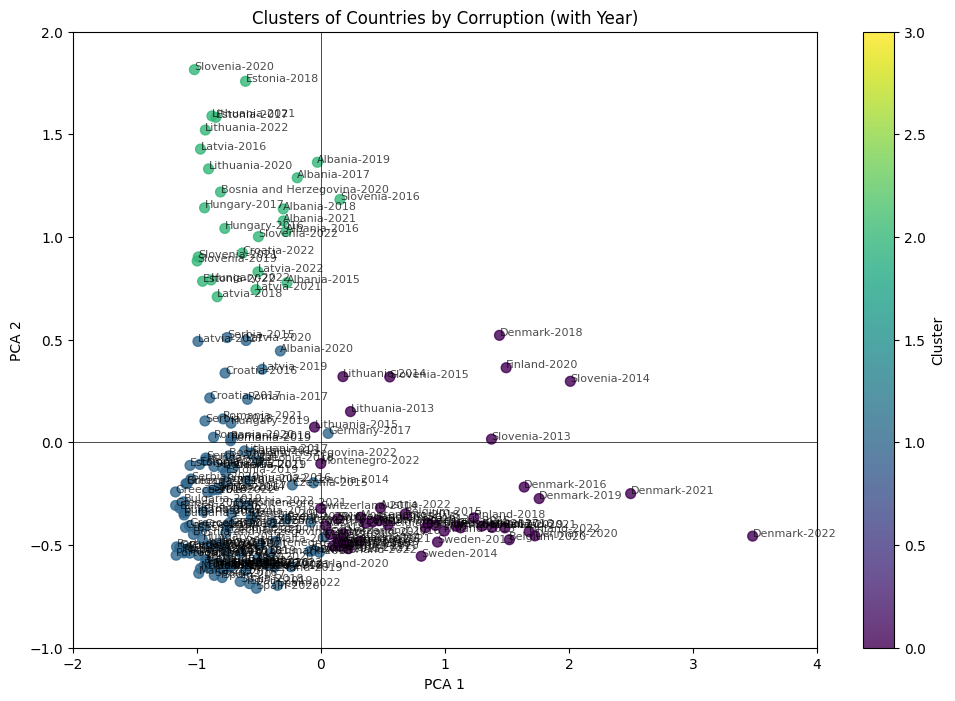

In [40]:
plt.figure(figsize=(12, 8))
# Scatter plot with cluster colors
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1], 
    c=df_clean['Cluster'], cmap='viridis', s=50, alpha=0.8
)

# Annotate each point with the Country-Year combination
for i, (country, year) in enumerate(zip(df_clean['Country'], df_clean['year'])):
    plt.annotate(f"{country}-{year}", (X_pca[i, 0], X_pca[i, 1]),
                 fontsize=8, alpha=0.7)

# Add a colorbar and labels
plt.colorbar(label='Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters of Countries by Corruption (with Year)')
plt.xlim(-2, 4)  # Adjust x-axis limits
plt.ylim(-1, 2)  # Adjust y-axis limits
plt.axhline(0, color='black',linewidth=0.5)  # horizontal line at y=0
plt.axvline(0, color='black',linewidth=0.5)  # vertical line at x=0
plt.show()

In [41]:
loadings = pd.DataFrame(
    pca.components_, 
    columns=columns_to_use, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
print("PCA Loadings:")
print(loadings)

PCA Loadings:
     Corruption  Corruption: Bribery  Corruption: Other acts of corruption  \
PC1    0.525699            -0.053418                              0.531386   
PC2    0.146703             0.986636                              0.012680   

        Fraud  Money laundering  
PC1  0.508407          0.424192  
PC2 -0.069125          0.009402  
